In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.functional as F

In [2]:
model = models.resnet18()

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

In [3]:
model.load_state_dict(torch.load('model_ft1.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
data_dir = 'inference/dummy'

In [6]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = data_transforms(img)
    return img_tensor.unsqueeze(0)

In [7]:
image_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.endswith(('.jpg', '.png'))]
images = torch.cat([preprocess_image(img_path) for img_path in image_paths])

In [8]:
with torch.no_grad():
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(outputs, 1)

In [9]:
predicted_classes = predicted_classes.detach().numpy()
probabilities = probabilities.detach().numpy()
class_names = {0: 'Cats', 1: 'Dogs'}

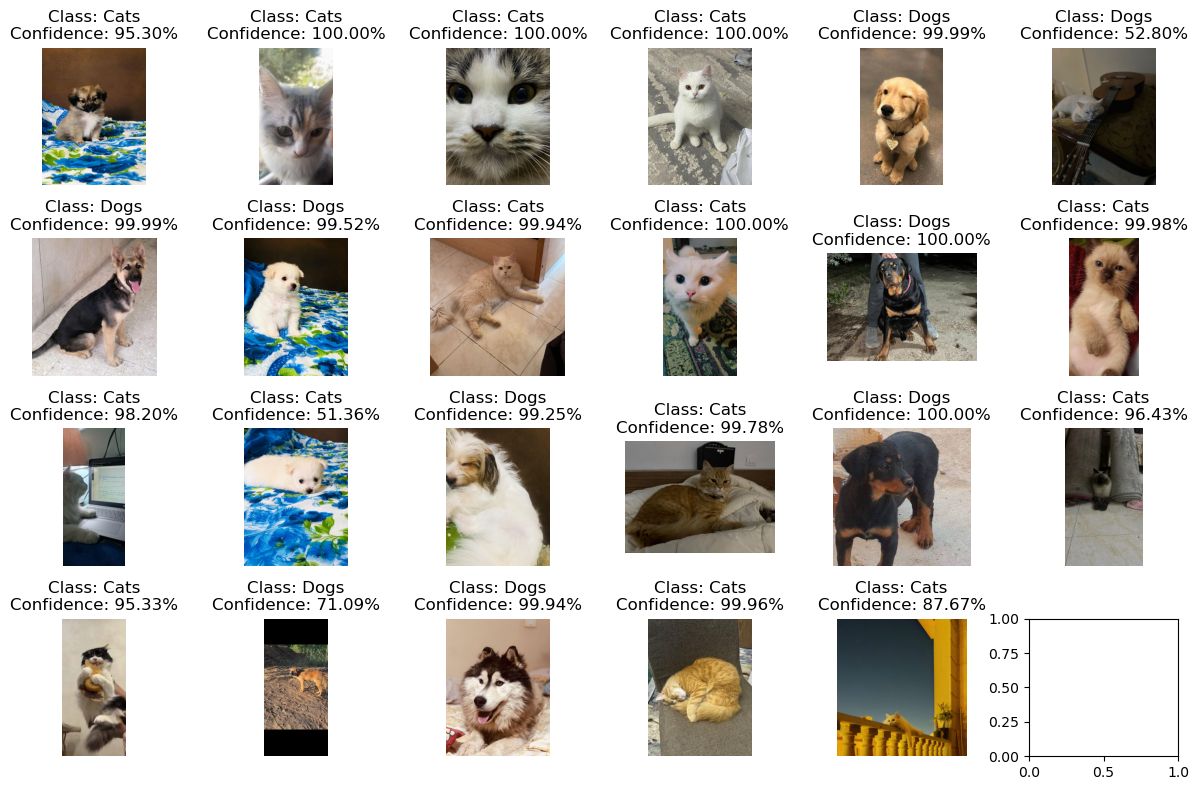

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8))
axes = axes.flatten()

for i, (image_path, predicted_class, probability) in enumerate(zip(image_paths, predicted_classes, probabilities)):
    img = mpimg.imread(image_path)
    confidence_score = probability[predicted_class] * 100
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {class_names[predicted_class]}\nConfidence: {confidence_score:.2f}%")
    axes[i].axis('off')

plt.tight_layout()
plt.show()